## Introduction 

Controlling buildings energy consumption is a challenging task.
During early design stage, accurate and rapid prediction of energy consumption could provide a quantitative basis 
for energy-saving designs.

Data set link.
https://www.kaggle.com/petermcnallysg/universal-design-space-building-energy-simulation

This data would help analyse and desing a prediction method for building energy consumption to improve the efficiency of energy performance during the conceptual design phase 



## Goal

 - Predict Energy usage from building  parameters

## Data Understanding 

- ID - Unique building ID
- BuildingType - DOE prototype building designation as implemented by OpenStudio-standards
- ClimateZone - ASHRAE Climate Zone designation
- TotalArea - estimate of total conditioned floor area (ft2)
- TotalArea_Setting – low, typ, high
- FloorArea – estimate of building 2D footprint area (ft2)
- FloorArea_Setting – low, typ, high
- NumFloors - number of floors (above-grade)
- PlateDepth – Building footprint width
- PlateLength – Building footprint length
- FloorHeight – Floor-to-floor height
- FloorHeight_Setting – low, typ, high
- Height - building height (ft)
- WWR – average window-to-wall ratio of all building facades
- SolarDesign – Orientation and window location (Bad, Typical, Good)
- Standard - building vintage
- HVAC - Heating, ventilation, and air conditioning type
- HVAC_Setting – Baseline, Good, Great, Ultra
- EnvelopeQuality_Setting – Baseline, HighPerformance, UltraPerformance
- WallRValue – Amount of wall insulation
- RoofRValue – Amount of roof insulation
- GlassandFrameUValue – Amount of heat gain/loss through window
- SHGC – Solar Heat Gain Coefficient
- LPD_Adjustment – Lighting power density reduction factor
- LPDAdjustmentSetting – Base, Improved, Best
- InteriorLightsFinalWper_sf – Final lighting power density value (w/m2)
- ExteriorLightsFinal1W – Exterior light 1 power (W)
- ExteriorLightsFinal2W – Exterior light 2 power (W)
- Setpoint_Setting – Thermostat setpoint (Baseline, Expanded [+-3 Degrees F])
- HeatingCoil – Type of Heating Coil
- COPEfficiencyHeating – Heating COP or efficiency
- CoolingCoil – Type of Cooling Coil
- COPEfficiencyCooling – Cooling COP or efficiency
- EUIkBTUper_sf – Energy Use Intensity (kBTU/ft2)


-  __The target variable is EUIkBTUper_sf i:e Energy Use Intensity in KILO British Thermal Unit per squarefoot.__

-  The target is an continuos variable. Hence we will formulate as Regression problem.

In [1]:
# ls

In [117]:
# pwd

### Load required libraries

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the dataset
data = pd.read_csv("Energy_consumption.csv")

In [5]:
# Check the metadata of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130374 entries, 0 to 130373
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      130374 non-null  int64  
 1   ID                              130374 non-null  object 
 2   BuildingType                    130374 non-null  object 
 3   ClimateZone                     130374 non-null  object 
 4   TotalArea                       130374 non-null  int64  
 5   TotalArea_Setting               130374 non-null  object 
 6   FloorArea                       130374 non-null  int64  
 7   FloorArea_Setting               130374 non-null  object 
 8   NumFloors                       130374 non-null  int64  
 9   PlateDepth                      130374 non-null  int64  
 10  PlateDepth_Setting              130374 non-null  object 
 11  PlateLength                     130374 non-null  int64  
 12  FloorHeight     

In [6]:
# Drop the garbage column
data.drop(columns=["Unnamed: 0"],inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130374 entries, 0 to 130373
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              130374 non-null  object 
 1   BuildingType                    130374 non-null  object 
 2   ClimateZone                     130374 non-null  object 
 3   TotalArea                       130374 non-null  int64  
 4   TotalArea_Setting               130374 non-null  object 
 5   FloorArea                       130374 non-null  int64  
 6   FloorArea_Setting               130374 non-null  object 
 7   NumFloors                       130374 non-null  int64  
 8   PlateDepth                      130374 non-null  int64  
 9   PlateDepth_Setting              130374 non-null  object 
 10  PlateLength                     130374 non-null  int64  
 11  FloorHeight                     130374 non-null  int64  
 12  FloorHeight_Sett

In [8]:
data.head()

,ID,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,Standard,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,COP_Efficiency_Heating,CoolingCoil,COP_Efficiency_Cooling,EUI_kBTU_per_sf
0,Outpatient_3A_110000_36667_75_13_40_61_25_MidL...,Outpatient,3A,118596,typ,39532,high,3,74,low,229,13,low,39,75.577558,.4_.4_.4_.4,Good,90.1-2013,PVAV with PFP boxes,Good,Baseline,13.33,26.34,0.61,0.25,0.7,Improved,0.70,121.66,5808.39,Expanded,Coil:Heating:Electric,1,Chiller:Electric:EIR,3.552525,94.452720
1,MidriseApartment_2B_300000_37500_64_12_40_20_2...,MidriseApartment,2B,316313,high,39539,high,8,67,typ,251,12,typ,96,78.930818,.4_.4_.4_.4,Bad,90.1-2013,VAV chiller with gas boiler reheat,Ultra,UltraPerformance,30.00,60.00,0.20,0.25,0.7,Improved,0.27,1755.60,0.00,Expanded,Coil:Heating:Water,Nan,Chiller:Electric:EIR,9.420536,40.021898
2,Laboratory_4C_200000_40000_115_15_40_52_40_Bes...,Laboratory,4C,201851,high,40370,high,5,111,low,151,15,typ,75,57.633588,.4_.4_.4_.4,Bad,90.1-2013,VAV chiller with gas boiler,Good,Baseline,16.33,31.34,0.52,0.40,0.4,Best,0.53,0.00,0.00,Baseline,Coil:Heating:Water,Nan,Chiller:Electric:EIR,7.536429,472.140167
3,Laboratory_4C_150000_25000_135_12_70_52_40_Mid...,Laboratory,4C,149991,typ,24998,typ,6,122,high,139,12,low,72,70.000000,.7_.7_.7_.7,Typical,90.1-2013,VAV air-cooled chiller with gas boiler,Great,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.92,0.00,0.00,Expanded,Coil:Heating:Water,Nan,Chiller:Electric:EIR,3.996591,339.584214
4,Hospital_4B_200000_40000_150_16_70_52_40_MidLi...,Hospital,4B,201851,typ,40370,high,5,111,high,151,16,high,80,70.000000,.7_.7_.7_.7,Typical,90.1-2013,VAV chiller with gas boiler reheat,Ultra,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.56,9454.20,0.00,Expanded,Coil:Heating:Water,Nan,Chiller:Electric:EIR,8.250000,66.279910


### Check the unique values of Categorical variables/Features

In [9]:
# Check the unique values of Building Type
data["BuildingType"].unique()

array(['Outpatient', 'MidriseApartment', 'Laboratory', 'Hospital',
       'LargeOffice', 'College', 'MediumOffice', 'HighriseApartment'],
      dtype=object)

In [10]:
data["ClimateZone"].unique()

array(['3A', '2B', '4C', '4B', '5B', '3C', '1A', '6A', '3B', '7A', '6B',
       '4A', '2A', '5A'], dtype=object)

In [11]:
# WWR_surfaces
data["WWR_surfaces"].unique()

array(['.4_.4_.4_.4', '.7_.7_.7_.7', '.25_.25_.25_.25'], dtype=object)

In [12]:
data["Standard"].unique()

array(['90.1-2013'], dtype=object)

In [13]:
data["HVAC"].unique()

array(['PVAV with PFP boxes', 'VAV chiller with gas boiler reheat',
       'VAV chiller with gas boiler',
       'VAV air-cooled chiller with gas boiler', 'Residential heat pump',
       'PSZ-AC with electric coil',
       'PVAV with gas heat with electric reheat', 'PSZ-HP',
       'PVAV with gas boiler reheat', 'PSZ-AC with no heat',
       'VAV air-cooled chiller with gas boiler reheat'], dtype=object)

In [14]:
data["HeatingCoil"].unique()

array(['Coil:Heating:Electric', 'Coil:Heating:Water',
       'Coil:Heating:DX:SingleSpeed'], dtype=object)

In [15]:
data["COP_Efficiency_Heating"].isna().sum()

0

-  Nan Values could not be captured by calling isna()
- Hence we can  check the unique values to identify the NaN

In [16]:
data["COP_Efficiency_Heating"].unique()

array(['1', 'Nan', '4.1776166136', '4.864607136900001', '5.3063131905',
       '4.174119193199999', '4.2179729052', '4.2769026924',
       '5.3455273514999995', '3.487442595', '4.7401895736',
       '4.7384031321', '5.2324158195', '5.4185391974999995',
       '3.480817606', '4.1832898572', '4.188244506', '4.81532836635',
       '4.2701904768', '4.7757465405', '3.586272819', '4.7712516318',
       '4.737587273100001', '5.222020767', '5.315279970000001',
       '5.345336733', '4.6947925566', '4.184931114', '4.2687071688',
       '5.2182916079999995', '5.3073371625000005', '5.3083169925',
       '3.491189712', '4.785373632150001', '4.817884662900001',
       '5.3019213195', '4.1655116292', '4.1731489392', '5.341143468',
       '5.3223236235', '4.2705678108', '4.2768628428', '4.81097461635',
       '3.539419191', '4.1988686064', '4.280291881199999', '3.527511217',
       '3.574755453', '3.553912547', '4.2646950564', '5.4014179335',
       '4.247303029199999', '5.211935088', '5.252868177', 

In [17]:
# COP_Efficiency_Heating has most of the data NaN value
# Almost 67% of data in this column has null value 
# Hence we can drop the column

len(data[data["COP_Efficiency_Heating"]=="Nan"])/len(data)

0.6795603417859389

In [18]:
data.drop(columns=["COP_Efficiency_Heating"],inplace=True)

In [19]:
data["CoolingCoil"].unique()

array(['Chiller:Electric:EIR', 'Coil:Cooling:DX:SingleSpeed',
       'Coil:Cooling:DX:TwoSpeed'], dtype=object)

### Analyse the target variable
 - The target varible is Energy use intensity in British thermal unit

In [20]:
data["EUI_kBTU_per_sf"].isna().sum()

0

In [21]:
data["EUI_kBTU_per_sf"].describe()

count    130374.000000
mean        138.735517
std         169.059328
min          18.086152
25%          46.265055
50%          73.690520
75%         105.126590
max        1068.565131
Name: EUI_kBTU_per_sf, dtype: float64

### Check the distribution of targte variable

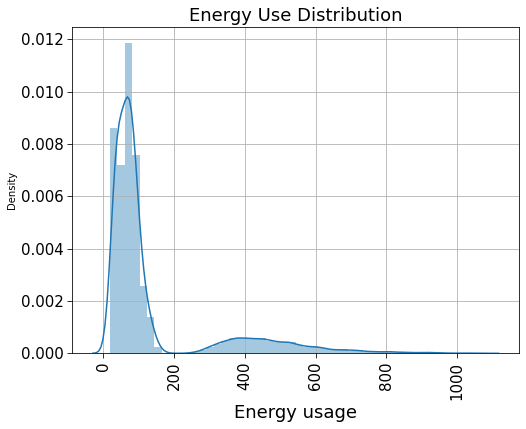

In [22]:
plt.figure(figsize=(8,6))
plt.title("Energy Use Distribution",fontsize=18)
sns.distplot(data["EUI_kBTU_per_sf"])
plt.tick_params(size=5,labelsize = 15)
plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
plt.xlabel("Energy usage",fontsize=18)
plt.grid(0.3) 

-  __The taret variable distribution is right skewed.__


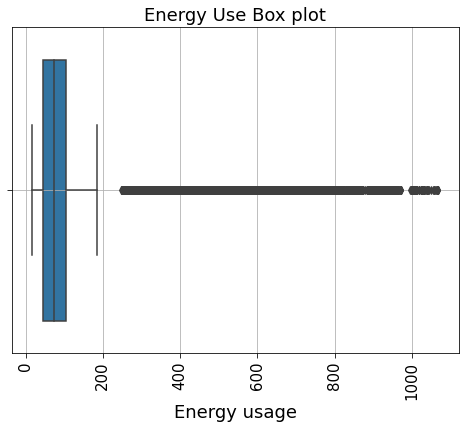

In [23]:
plt.figure(figsize=(8,6))
plt.title("Energy Use Box plot",fontsize=18)
sns.boxplot(data["EUI_kBTU_per_sf"])
plt.tick_params(size=5,labelsize = 15)
plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
plt.xlabel("Energy usage",fontsize=18)
plt.grid(0.3) 

 - __The target variable has lot of outliers.__

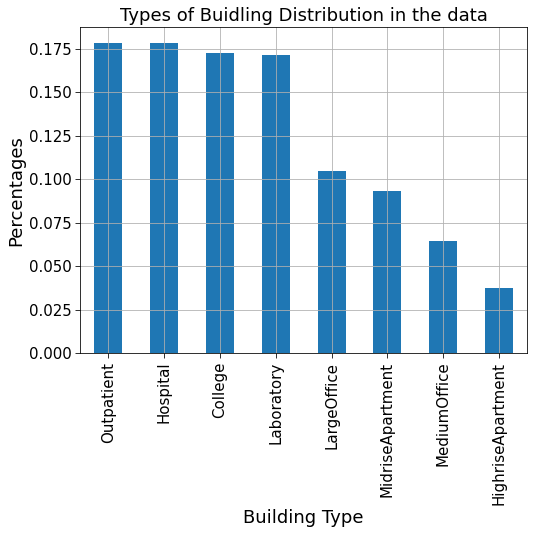

In [24]:
## Building Type
plt.figure(figsize=(8,6))
plt.title("Types of Buidling Distribution in the data",fontsize=18)
data["BuildingType"].value_counts(normalize=True).plot.bar()
plt.tick_params(size=5,labelsize = 15)
plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
plt.xlabel("Building Type",fontsize=18)
plt.ylabel("Percentages",fontsize=18)
plt.grid(0.3)

In [25]:
# Function to plot Target vs Categorical Column
def plot_figure(column_name,x_label):
    plt.figure(figsize=(8,6))
    plt.title(f"{x_label} vs Energy consumptions",fontsize=18)
    data.groupby(column_name)["EUI_kBTU_per_sf"].median().plot.bar()
    plt.tick_params(size=5,labelsize = 15)
    plt.xticks(rotation = "vertical") # xticks are rotated as the visuallization was not clear
    plt.xlabel(f"{x_label}",fontsize=18)
    plt.ylabel("Engergy Consumption in BTU Median",fontsize=18)
    plt.grid(0.3)

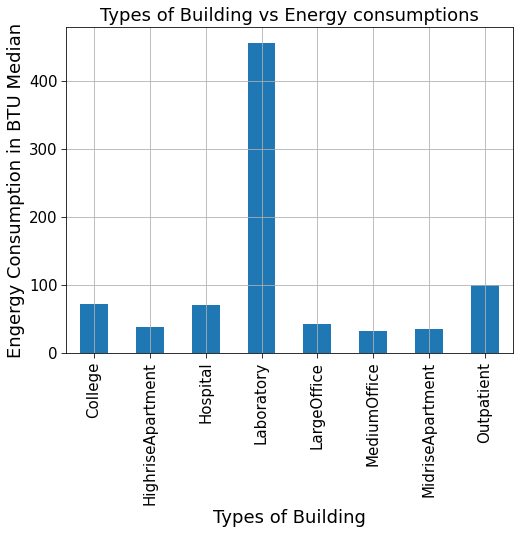

In [26]:
plot_figure("BuildingType","Types of Building")

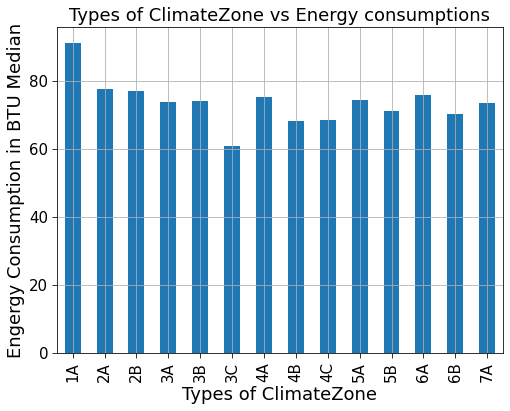

In [27]:
# ClimateZone
plot_figure("ClimateZone","Types of ClimateZone")

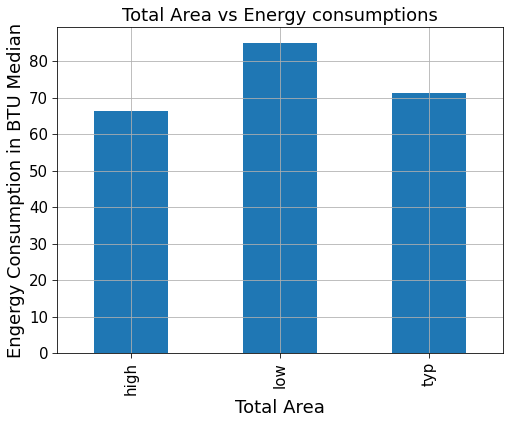

In [28]:
#TotalArea_Setting
plot_figure("TotalArea_Setting","Total Area")

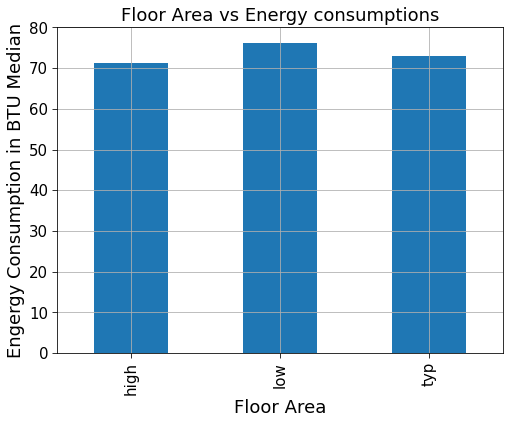

In [29]:
# FloorArea_Setting
plot_figure("FloorArea_Setting","Floor Area")

In [30]:
#PlateDepth_Setting
data["PlateDepth_Setting"].unique()

array(['low', 'typ', 'high'], dtype=object)

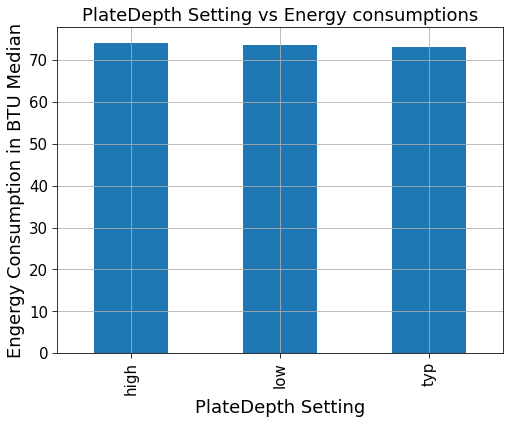

In [31]:
plot_figure("PlateDepth_Setting","PlateDepth Setting")

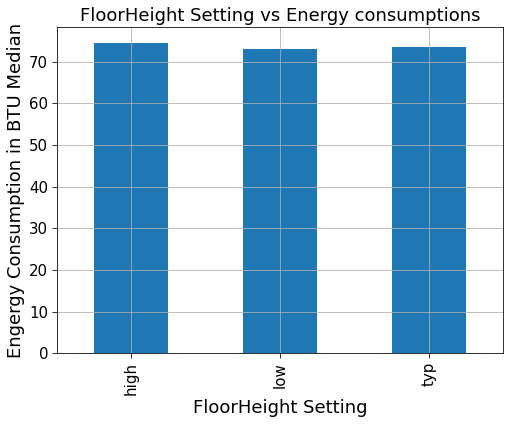

In [32]:
#FloorHeight_Setting
plot_figure("FloorHeight_Setting","FloorHeight Setting")

In [33]:
data["WWR_surfaces"].unique()

array(['.4_.4_.4_.4', '.7_.7_.7_.7', '.25_.25_.25_.25'], dtype=object)

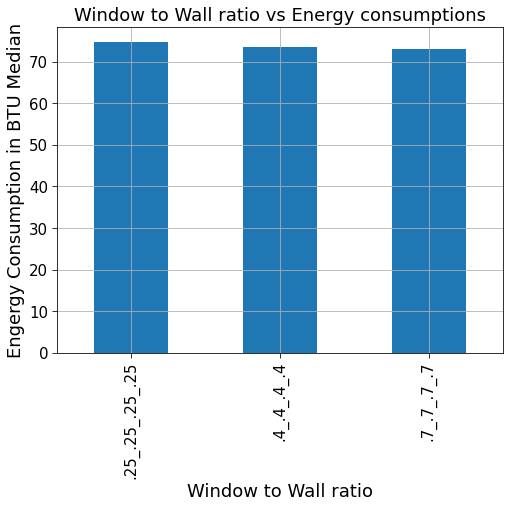

In [34]:
plot_figure("WWR_surfaces","Window to Wall ratio")

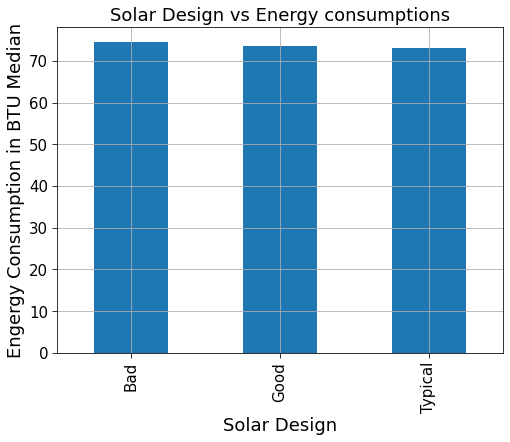

In [35]:
plot_figure("SolarDesign","Solar Design")

In [36]:
data["Standard"].unique()

array(['90.1-2013'], dtype=object)

- Standard field has no variance
- Hence we are deleting it .


In [37]:
data.drop(columns=["Standard"],inplace=True)

In [38]:
# plot_figure("Standard","Standard")

In [39]:
#HVAC

data["HVAC"].unique()

array(['PVAV with PFP boxes', 'VAV chiller with gas boiler reheat',
       'VAV chiller with gas boiler',
       'VAV air-cooled chiller with gas boiler', 'Residential heat pump',
       'PSZ-AC with electric coil',
       'PVAV with gas heat with electric reheat', 'PSZ-HP',
       'PVAV with gas boiler reheat', 'PSZ-AC with no heat',
       'VAV air-cooled chiller with gas boiler reheat'], dtype=object)

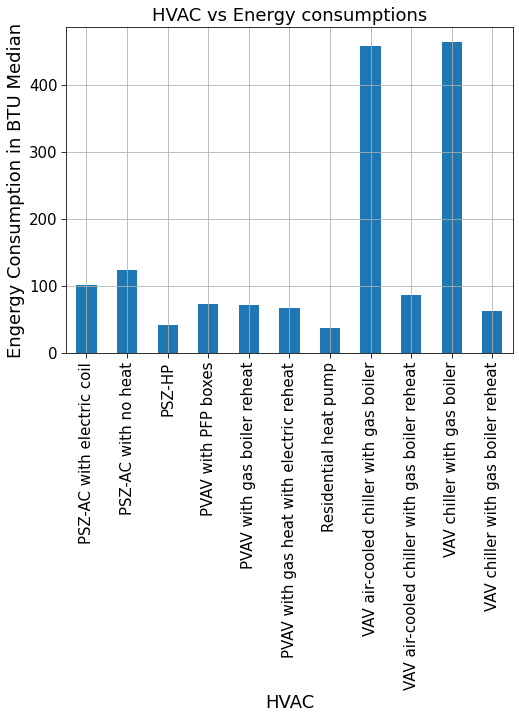

In [40]:
plot_figure("HVAC","HVAC")

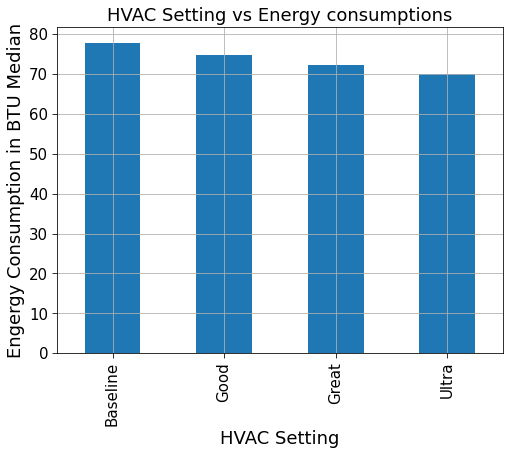

In [41]:
plot_figure("HVAC_Setting","HVAC Setting")
 

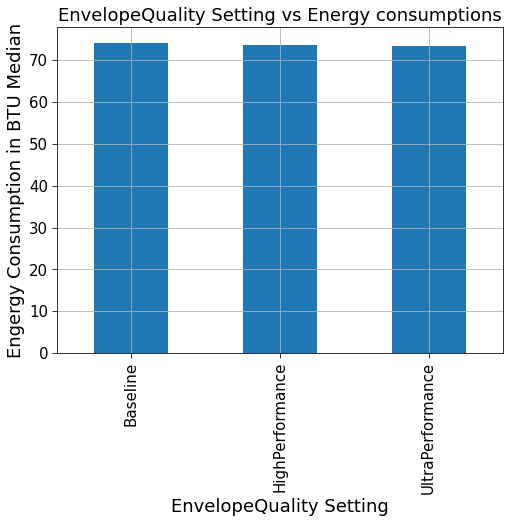

In [42]:
plot_figure("EnvelopeQuality_Setting","EnvelopeQuality Setting")

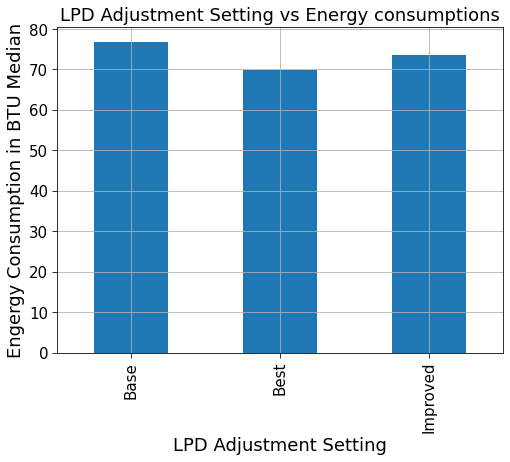

In [43]:
plot_figure("LPD_Adjustment_Setting","LPD Adjustment Setting")

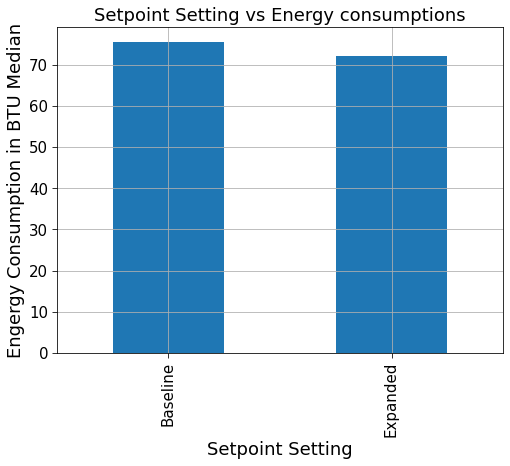

In [44]:
plot_figure("Setpoint_Setting","Setpoint Setting")

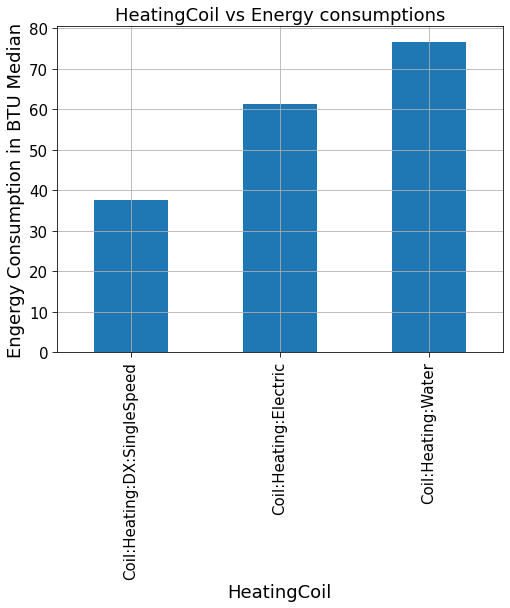

In [45]:
plot_figure("HeatingCoil","HeatingCoil")

In [46]:
# data["COP_Efficiency_Heating"].unique()

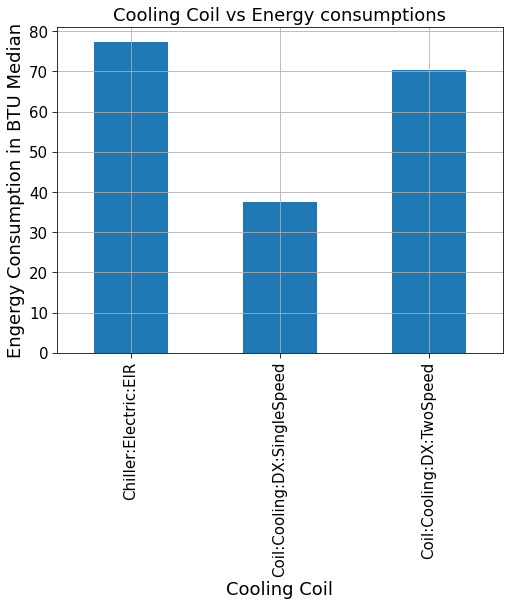

In [47]:
plot_figure("CoolingCoil","Cooling Coil")

## Numeric Columns analysis

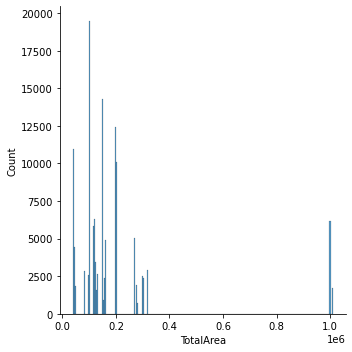

In [48]:
# Total Area

sns.displot(data["TotalArea"])

In [49]:
data["TotalArea"].describe()

count    1.303740e+05
mean     1.992267e+05
std      2.150503e+05
min      3.994400e+04
25%      1.016330e+05
50%      1.497120e+05
75%      2.018510e+05
max      1.009256e+06
Name: TotalArea, dtype: float64

<AxesSubplot:xlabel='TotalArea'>

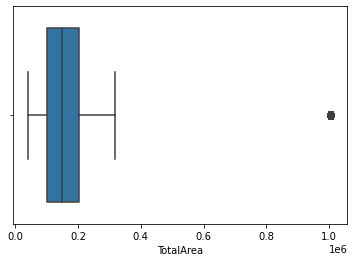

In [50]:
sns.boxplot(data["TotalArea"])

<AxesSubplot:xlabel='FloorArea', ylabel='Density'>

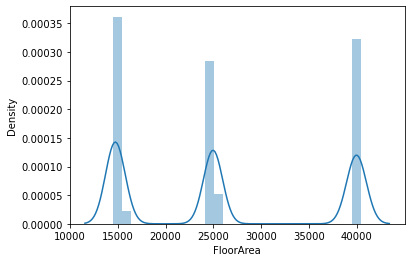

In [51]:
#FloorArea
sns.distplot(data["FloorArea"])
# sns.boxplot(data["FloorArea"])

In [52]:
data["FloorArea"].unique()

array([39532, 39539, 40370, 24998, 14971, 14519, 24946, 25011, 40051,
       14564, 14524, 25103, 39967, 14542, 25369, 15011, 39603, 25045,
       15490, 25415, 15478, 24929, 39712, 39944, 14923, 40434, 25214,
       24503, 14986, 14634, 24721, 15000, 14997, 14553, 24560, 15491,
       14556, 24538, 24978, 14907, 14531, 14914], dtype=int64)

<AxesSubplot:xlabel='NumFloors', ylabel='Density'>

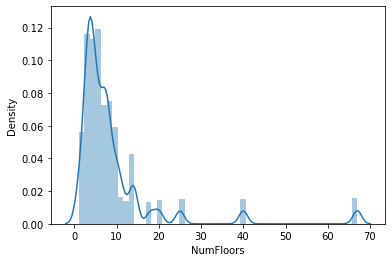

In [53]:
sns.distplot(data["NumFloors"])

<AxesSubplot:ylabel='Frequency'>

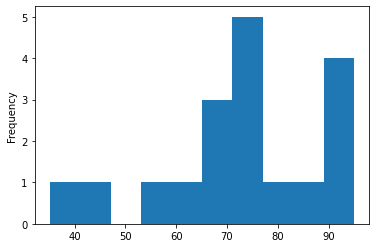

In [54]:
data.groupby(["NumFloors"])["EUI_kBTU_per_sf"].median().plot.hist()

<AxesSubplot:xlabel='NumFloors', ylabel='EUI_kBTU_per_sf'>

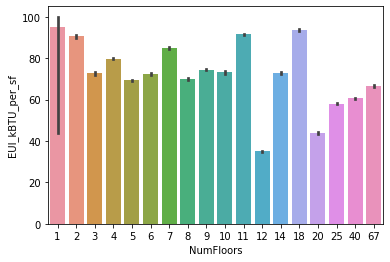

In [55]:
sns.barplot(x="NumFloors",y="EUI_kBTU_per_sf",data=data,estimator=np.median)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130374 entries, 0 to 130373
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              130374 non-null  object 
 1   BuildingType                    130374 non-null  object 
 2   ClimateZone                     130374 non-null  object 
 3   TotalArea                       130374 non-null  int64  
 4   TotalArea_Setting               130374 non-null  object 
 5   FloorArea                       130374 non-null  int64  
 6   FloorArea_Setting               130374 non-null  object 
 7   NumFloors                       130374 non-null  int64  
 8   PlateDepth                      130374 non-null  int64  
 9   PlateDepth_Setting              130374 non-null  object 
 10  PlateLength                     130374 non-null  int64  
 11  FloorHeight                     130374 non-null  int64  
 12  FloorHeight_Sett

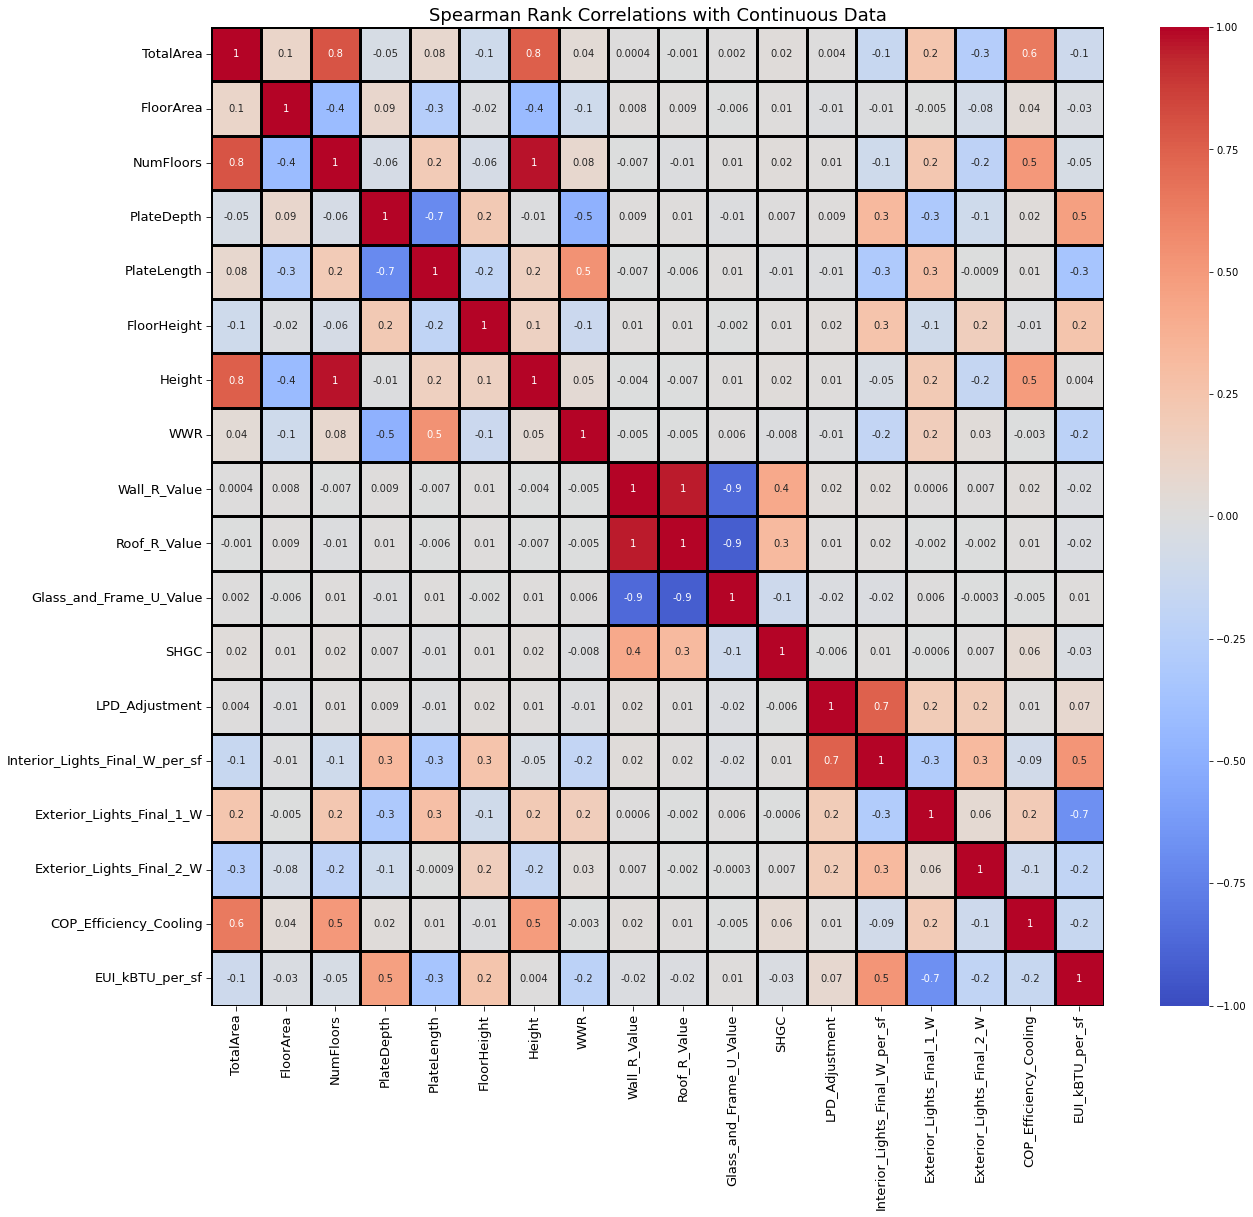

In [57]:
plt.figure(figsize=(20,18)) #figure size
plt.title("Spearman Rank Correlations with Continuous Data",fontsize=18)
sns.heatmap(data.corr(method="spearman"),annot=True,fmt='.1g',cmap= 'coolwarm',vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 13)

- __From the heatmap we could see :Exterior light,Interior light,Platedepth are contributing are correlated to target variable .__
    

In [60]:
from sklearn.feature_selection import mutual_info_regression

In [61]:
X = data.iloc[:,:-1]
X

,ID,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,CoolingCoil,COP_Efficiency_Cooling
0,Outpatient_3A_110000_36667_75_13_40_61_25_MidL...,Outpatient,3A,118596,typ,39532,high,3,74,low,229,13,low,39,75.577558,.4_.4_.4_.4,Good,PVAV with PFP boxes,Good,Baseline,13.33,26.34,0.61,0.25,0.7,Improved,0.70,121.66,5808.39,Expanded,Coil:Heating:Electric,Chiller:Electric:EIR,3.552525
1,MidriseApartment_2B_300000_37500_64_12_40_20_2...,MidriseApartment,2B,316313,high,39539,high,8,67,typ,251,12,typ,96,78.930818,.4_.4_.4_.4,Bad,VAV chiller with gas boiler reheat,Ultra,UltraPerformance,30.00,60.00,0.20,0.25,0.7,Improved,0.27,1755.60,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,9.420536
2,Laboratory_4C_200000_40000_115_15_40_52_40_Bes...,Laboratory,4C,201851,high,40370,high,5,111,low,151,15,typ,75,57.633588,.4_.4_.4_.4,Bad,VAV chiller with gas boiler,Good,Baseline,16.33,31.34,0.52,0.40,0.4,Best,0.53,0.00,0.00,Baseline,Coil:Heating:Water,Chiller:Electric:EIR,7.536429
3,Laboratory_4C_150000_25000_135_12_70_52_40_Mid...,Laboratory,4C,149991,typ,24998,typ,6,122,high,139,12,low,72,70.000000,.7_.7_.7_.7,Typical,VAV air-cooled chiller with gas boiler,Great,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.92,0.00,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,3.996591
4,Hospital_4B_200000_40000_150_16_70_52_40_MidLi...,Hospital,4B,201851,typ,40370,high,5,111,high,151,16,high,80,70.000000,.7_.7_.7_.7,Typical,VAV chiller with gas boiler reheat,Ultra,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.56,9454.20,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,8.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130369,Outpatient_3B_40000_20000_100_13_70_37_25_MidL...,Outpatient,3B,49007,low,24503,typ,2,106,typ,155,13,low,26,70.000000,.7_.7_.7_.7,Typical,PSZ-HP,Great,HighPerformance,16.33,31.34,0.37,0.25,0.7,Improved,0.70,121.66,5808.39,Baseline,Coil:Heating:Electric,Coil:Cooling:DX:TwoSpeed,4.454195
130370,College_6A_150000_15000_65_13_25_52_40_BestLig...,College,6A,149863,high,14986,low,10,62,low,280,13,low,130,25.000000,.25_.25_.25_.25,Typical,PVAV with gas heat with electric reheat,Baseline,Baseline,20.33,31.34,0.52,0.40,0.4,Best,0.40,176.72,3420.80,Expanded,Coil:Heating:Water,Coil:Cooling:DX:TwoSpeed,3.299403
130371,Outpatient_3C_40000_40000_75_15_40_61_25_BestL...,Outpatient,3C,40051,low,40051,high,1,75,low,221,15,typ,15,74.662162,.4_.4_.4_.4,Bad,PSZ-HP,Great,Baseline,13.33,26.34,0.61,0.25,0.4,Best,0.40,69.52,3319.08,Expanded,Coil:Heating:Electric,Coil:Cooling:DX:TwoSpeed,4.454195
130372,Laboratory_4A_100000_25000_125_12_70_52_40_Bas...,Laboratory,4A,99994,low,24998,typ,4,122,typ,139,12,low,48,53.256705,.7_.7_.7_.7,Bad,VAV air-cooled chiller with gas boiler,Great,Baseline,16.33,31.34,0.52,0.40,1.0,Base,1.31,0.00,0.00,Baseline,Coil:Heating:Water,Chiller:Electric:EIR,3.996591


In [62]:
numeric_columns = X.columns[~(X.dtypes==object)]
numeric_data = X[numeric_columns]

In [63]:
y = data.iloc[:,-1]
y

0          94.452720
1          40.021898
2         472.140167
3         339.584214
4          66.279910
             ...    
130369    125.768299
130370     75.216125
130371     95.013919
130372    426.791189
130373    449.344121
Name: EUI_kBTU_per_sf, Length: 130374, dtype: float64

In [64]:
mutual_score = mutual_info_regression(numeric_data,y)

In [65]:
mutual_score

array([1.03386032, 0.66690066, 0.4810362 , 0.63957388, 0.63542285,
       0.43368525, 0.84090178, 0.47456265, 0.03932246, 0.03675965,
       0.03169115, 0.03546174, 0.03046385, 1.1066821 , 1.26681683,
       0.75580001, 0.51312461])

In [66]:
mutual_score_df = pd.DataFrame(mutual_score,columns=["ms"])

In [67]:
len(numeric_columns)

17

In [68]:
mutual_score_df.set_index(numeric_columns,inplace=True)

## Plot the mutual information score between Features and Target variable

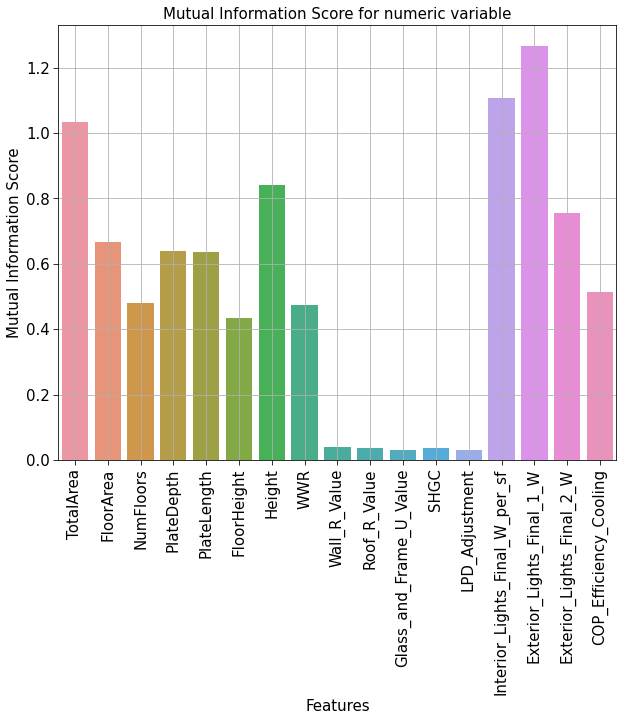

In [69]:
plt.figure(figsize=[10,8])
sns.barplot(x =mutual_score_df.index,y="ms",data=mutual_score_df )
plt.title("Mutual Information Score for numeric variable",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Findings 

 - __The important features are__
    - __Total area__
    - __Floor Area__
    - __No of floors__
    - __Platedepth__
    - __Exterior lights__
    - __Interior lights__
    - __COP efficiency colling etc.__
    
    

In [70]:
data.drop(columns=["ID"],inplace=True)

In [71]:
data.head()

,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,CoolingCoil,COP_Efficiency_Cooling,EUI_kBTU_per_sf
0,Outpatient,3A,118596,typ,39532,high,3,74,low,229,13,low,39,75.577558,.4_.4_.4_.4,Good,PVAV with PFP boxes,Good,Baseline,13.33,26.34,0.61,0.25,0.7,Improved,0.70,121.66,5808.39,Expanded,Coil:Heating:Electric,Chiller:Electric:EIR,3.552525,94.452720
1,MidriseApartment,2B,316313,high,39539,high,8,67,typ,251,12,typ,96,78.930818,.4_.4_.4_.4,Bad,VAV chiller with gas boiler reheat,Ultra,UltraPerformance,30.00,60.00,0.20,0.25,0.7,Improved,0.27,1755.60,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,9.420536,40.021898
2,Laboratory,4C,201851,high,40370,high,5,111,low,151,15,typ,75,57.633588,.4_.4_.4_.4,Bad,VAV chiller with gas boiler,Good,Baseline,16.33,31.34,0.52,0.40,0.4,Best,0.53,0.00,0.00,Baseline,Coil:Heating:Water,Chiller:Electric:EIR,7.536429,472.140167
3,Laboratory,4C,149991,typ,24998,typ,6,122,high,139,12,low,72,70.000000,.7_.7_.7_.7,Typical,VAV air-cooled chiller with gas boiler,Great,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.92,0.00,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,3.996591,339.584214
4,Hospital,4B,201851,typ,40370,high,5,111,high,151,16,high,80,70.000000,.7_.7_.7_.7,Typical,VAV chiller with gas boiler reheat,Ultra,Baseline,16.33,31.34,0.52,0.40,0.7,Improved,0.56,9454.20,0.00,Expanded,Coil:Heating:Water,Chiller:Electric:EIR,8.250000,66.279910


In [72]:
cat_columns = data.columns[data.dtypes==object]

In [73]:
cat_columns

Index(['BuildingType', 'ClimateZone', 'TotalArea_Setting', 'FloorArea_Setting', 'PlateDepth_Setting', 'FloorHeight_Setting', 'WWR_surfaces', 'SolarDesign', 'HVAC', 'HVAC_Setting', 'EnvelopeQuality_Setting', 'LPD_Adjustment_Setting', 'Setpoint_Setting', 'HeatingCoil', 'CoolingCoil'], dtype='object')

### Seprate the Target and Features

In [74]:
target = data.pop("EUI_kBTU_per_sf")

In [75]:
features = data.iloc[:,:-1]

In [76]:
from sklearn.model_selection import train_test_split

## Perform Train Test split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=40)

In [78]:
X_train.shape

(91261, 31)

In [79]:
X_test.shape

(39113, 31)

In [80]:
y_train.shape

(91261,)

In [81]:
y_test.shape

(39113,)

## Convert Categorical data to Numerical via lable encoding 

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
t = X_train[cat_columns]

In [84]:
print(len(cat_columns))
print(cat_columns)

15
Index(['BuildingType', 'ClimateZone', 'TotalArea_Setting', 'FloorArea_Setting', 'PlateDepth_Setting', 'FloorHeight_Setting', 'WWR_surfaces', 'SolarDesign', 'HVAC', 'HVAC_Setting', 'EnvelopeQuality_Setting', 'LPD_Adjustment_Setting', 'Setpoint_Setting', 'HeatingCoil', 'CoolingCoil'], dtype='object')


In [85]:
# model_list = list()

# le0 = LabelEncoder()
# X_train[cat_columns[0]] = le0.fit_transform(X_train[cat_columns[0]])
# model_list.append(le0)


# le1 = LabelEncoder()
# X_train[cat_columns[1]] = le1.fit_transform(X_train[cat_columns[1]])
# model_list.append(le1)

# le2 = LabelEncoder()
# X_train[cat_columns[2]] = le2.fit_transform(X_train[cat_columns[2]])
# model_list.append(le2)

# le3 = LabelEncoder()
# X_train[cat_columns[3]] = le3.fit_transform(X_train[cat_columns[3]])
# model_list.append(le3)

# le4 = LabelEncoder()
# X_train[cat_columns[4]] = le4.fit_transform(X_train[cat_columns[4]])
# model_list.append(le4)

# le5 = LabelEncoder()
# X_train[cat_columns[5]] = le5.fit_transform(X_train[cat_columns[5]])
# model_list.append(le5)

# le6 = LabelEncoder()
# X_train[cat_columns[6]] = le6.fit_transform(X_train[cat_columns[6]])
# model_list.append(le6)

# le7 = LabelEncoder()
# X_train[cat_columns[7]] = le7.fit_transform(X_train[cat_columns[7]])
# model_list.append(le7)

# le8 = LabelEncoder()
# X_train[cat_columns[8]] = le8.fit_transform(X_train[cat_columns[8]])
# model_list.append(le8)

# le9 = LabelEncoder()
# X_train[cat_columns[9]] = le9.fit_transform(X_train[cat_columns[9]])
# model_list.append(le9)

# le10 = LabelEncoder()
# X_train[cat_columns[10]] = le10.fit_transform(X_train[cat_columns[10]])
# model_list.append(le10)

# le11 = LabelEncoder()
# X_train[cat_columns[11]] = le11.fit_transform(X_train[cat_columns[11]])
# model_list.append(le11)

# le12 = LabelEncoder()
# X_train[cat_columns[12]] = le12.fit_transform(X_train[cat_columns[12]])
# model_list.append(le12)

# le13 = LabelEncoder()
# X_train[cat_columns[13]] = le13.fit_transform(X_train[cat_columns[13]])
# model_list.append(le13)


# le14 = LabelEncoder()
# X_train[cat_columns[14]] = le14.fit_transform(X_train[cat_columns[14]])
# model_list.append(le14)



# # for i in cat_columns:
# #     f"le{i}" = LabelEncoder()
# #     X_train[i] = le.fit_transform(X_train[i])


encoders = {}
for i in cat_columns:
    encoders[i] = LabelEncoder()
    X_train[i] = encoders[i].fit_transform(X_train[i])
    print(i)
    


BuildingType
ClimateZone
TotalArea_Setting
FloorArea_Setting
PlateDepth_Setting
FloorHeight_Setting
WWR_surfaces
SolarDesign
HVAC
HVAC_Setting
EnvelopeQuality_Setting
LPD_Adjustment_Setting
Setpoint_Setting
HeatingCoil
CoolingCoil


In [86]:
for i in cat_columns:
    X_test[i] = encoders[i].transform(X_test[i])
    print(i)

BuildingType
ClimateZone
TotalArea_Setting
FloorArea_Setting
PlateDepth_Setting
FloorHeight_Setting
WWR_surfaces
SolarDesign
HVAC
HVAC_Setting
EnvelopeQuality_Setting
LPD_Adjustment_Setting
Setpoint_Setting
HeatingCoil
CoolingCoil


In [87]:
X_train.head()

,BuildingType,ClimateZone,TotalArea,TotalArea_Setting,FloorArea,FloorArea_Setting,NumFloors,PlateDepth,PlateDepth_Setting,PlateLength,FloorHeight,FloorHeight_Setting,Height,WWR,WWR_surfaces,SolarDesign,HVAC,HVAC_Setting,EnvelopeQuality_Setting,Wall_R_Value,Roof_R_Value,Glass_and_Frame_U_Value,SHGC,LPD_Adjustment,LPD_Adjustment_Setting,Interior_Lights_Final_W_per_sf,Exterior_Lights_Final_1_W,Exterior_Lights_Final_2_W,Setpoint_Setting,HeatingCoil,CoolingCoil
84891,1,11,299990,0,15000,1,20,45,1,401,10,1,200,25.000000,0,2,10,1,2,30.00,60.00,0.20,0.40,0.4,1,0.15,4288.00,0.00,0,2,0
667,2,6,998599,0,39944,0,25,82,1,201,15,2,375,25.000000,0,2,10,3,2,30.00,60.00,0.20,0.40,0.4,1,0.32,5402.40,0.00,1,2,0
59644,3,4,119901,1,39967,0,3,127,2,129,18,0,54,40.000000,1,2,7,2,0,13.33,26.34,0.61,0.25,1.0,0,1.31,0.00,0.00,0,2,0
85298,2,5,199720,2,39944,0,5,82,1,201,14,1,70,40.000000,1,2,10,3,1,16.33,31.34,0.37,0.25,0.4,1,0.32,5402.40,0.00,0,2,0
56408,7,3,46473,1,15491,2,3,75,1,222,13,1,39,74.747475,1,0,2,0,0,13.33,26.34,0.61,0.25,0.4,1,0.40,69.52,3319.08,1,1,2


In [88]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model with Linear Regression

In [89]:
lm = LinearRegression()

In [90]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [91]:
lr_model = lm.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)


# cv_score = cross_val_score(lm, X_train, y_train, cv=5, scoring='r2')

# print(f"Cross validation score: {cv_score}")

In [92]:
r2_score(y_test,y_pred)

0.6335414898231821

In [93]:
lr_model.coef_

array([ 5.70855494e+00, -4.36001617e+00, -1.22585391e-04,  4.64118782e+00,
       -3.92764250e-04, -1.21228152e+00,  3.87530149e+00,  7.05557623e-01,
        1.02025525e+01,  5.49519950e-02, -1.97387091e-01, -7.61354737e+00,
       -2.45266184e-01, -2.01411578e-01,  2.05045915e+00, -2.63048157e+00,
       -1.11653056e+00, -1.36596451e+01, -7.64359368e+00,  3.12799330e-01,
        1.21285090e-01, -4.07676133e+00,  8.59925522e+01, -3.61605024e+02,
        1.07143144e+00,  4.57943963e+02, -4.02918612e-03, -3.34683234e-03,
       -1.47806042e+01,  7.12919128e+01, -5.32255840e+01])

In [94]:
lr_param = pd.DataFrame(lr_model.coef_,columns=["parameters"])
lr_param

,parameters
0,5.708555
1,-4.360016
2,-0.000123
3,4.641188
4,-0.000393
5,-1.212282
6,3.875301
7,0.705558
8,10.202552
9,0.054952


In [95]:
lr_param.set_index(X_train.columns,inplace=True)

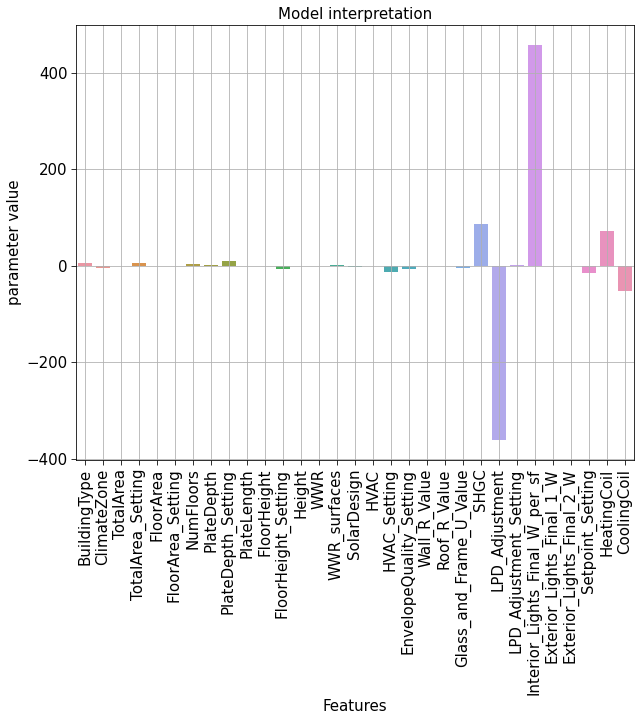

In [96]:
plt.figure(figsize=[10,8])
sns.barplot(x=lr_param.index,y='parameters',data=lr_param)
plt.title("Model interpretation",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("parameter value",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)




In [97]:
ridge = Ridge(alpha=0.01)
cv_score = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
print(f"Cross validation score: {cv_score}")

Cross validation score: [0.62804644 0.62744639 0.64068847 0.63949978 0.64090682]


## Findings from Linear Regression
- linear regression shows LPD Adjustment,Interior lights final etc are important columns
- Peformance of the model remain with 62-63%

## Model building with Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
lr_dtree = DecisionTreeRegressor()
lr_tree = lr_dtree.fit(X_train,y_train)

In [100]:
lr_tree.score(X_train,y_train)

1.0

In [101]:
y_pred_tree = lr_tree.predict(X_test)

In [102]:
r2_score(y_test,y_pred_tree)

0.9996012608751799

In [103]:
lr_tree.feature_importances_

array([5.49242702e-03, 5.47566499e-02, 3.51963481e-03, 1.93305423e-04,
       4.59755134e-04, 4.44729473e-04, 7.16604832e-05, 2.90379900e-05,
       2.33840002e-05, 1.25993607e-04, 5.98996545e-03, 7.62318181e-03,
       2.02515329e-04, 1.81331381e-04, 3.24655698e-05, 7.11152919e-05,
       3.43790881e-04, 3.92595193e-02, 3.52756390e-05, 3.38600797e-05,
       2.65010175e-05, 4.88437225e-05, 4.16612819e-04, 8.72758397e-05,
       6.64038814e-05, 4.97364232e-05, 8.72947841e-01, 8.95980751e-06,
       7.44818137e-03, 8.20868087e-06, 1.83669489e-06])

In [104]:
f_imp = pd.DataFrame(lr_tree.feature_importances_,columns=["fea_imp"],index=X_train.columns)

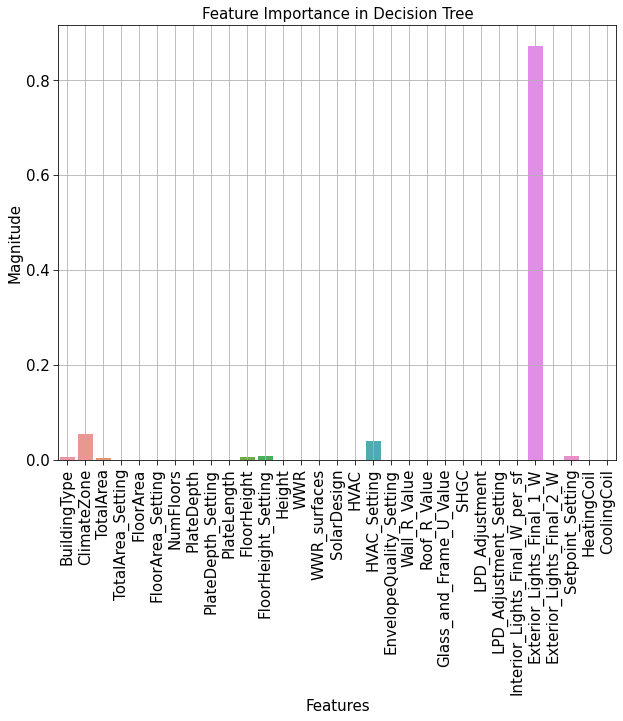

In [105]:
plt.figure(figsize=[10,8])
sns.barplot(x=f_imp.index,y='fea_imp',data=f_imp)
plt.title("Feature Importance in Decision Tree",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

 ## FIndings from Decision Tree Model:
 -  __The target variable(Enegy consumption) is heavily dependant on Exterior lighting.__

## Model building with Boosting

In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
lr_ada = AdaBoostRegressor()
ada_model = lr_ada.fit(X_train,y_train)

In [108]:
ada_model.score(X_train,y_train)

0.9683934667847589

In [109]:
y_pred_ada = ada_model.predict(X_test)

In [110]:
r2_score(y_test,y_pred_ada)

0.9681567606674342

In [111]:
ada_model.feature_importances_

array([1.42943505e-03, 2.07610274e-01, 2.33662367e-02, 0.00000000e+00,
       4.79600191e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34627796e-01, 5.87590902e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.36133008e-03, 1.79397663e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.42298397e-01, 0.00000000e+00,
       9.32299063e-02, 7.05097114e-06, 0.00000000e+00])

In [112]:
ada_f = pd.DataFrame(ada_model.feature_importances_,columns=["fea_imp_ada"],index=X_train.columns)

In [113]:
ada_f.sort_values(by="fea_imp_ada",ascending=False)

,fea_imp_ada
Exterior_Lights_Final_1_W,0.342298
ClimateZone,0.207610
HVAC_Setting,0.179398
FloorHeight,0.134628
Setpoint_Setting,0.093230
TotalArea,0.023366
HVAC,0.007361
FloorHeight_Setting,0.005876
FloorArea,0.004796
BuildingType,0.001429


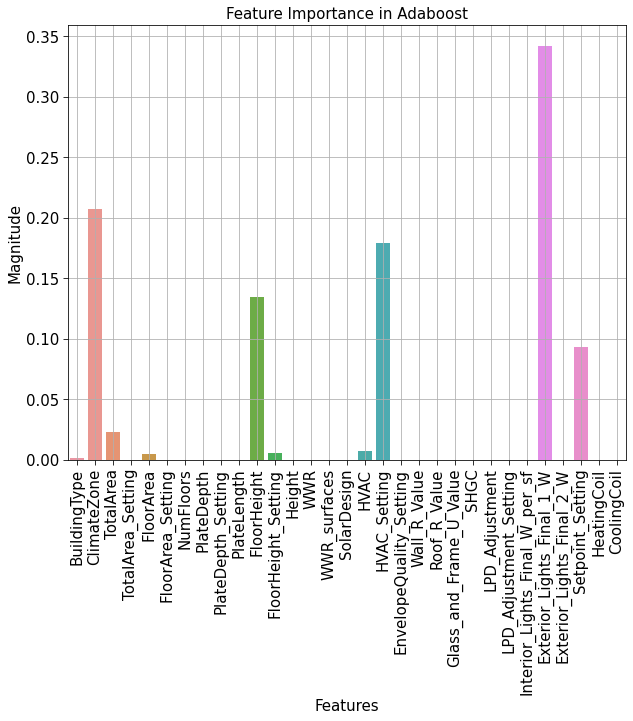

In [114]:
plt.figure(figsize=[10,8])
sns.barplot(x=ada_f.index,y='fea_imp_ada',data=ada_f)
plt.title("Feature Importance in Adaboost",size=15)
plt.xticks(rotation="vertical")
plt.ylabel("Magnitude",size=15)
plt.xlabel("Features",size=15)
plt.tick_params(size=5,labelsize = 15) # Tick size in both X and Y axes
plt.grid(0.3)

## Findings from Adaboost model

- __The training and test score remain close to 96%.__
- __ClimateZOne,Floor Height,HVAC settings,Exterior light,setpoint setting are important features.__